In [31]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

## DatetimeIndex

In [7]:
# parse_dates: turn strings into datetime object
# index_col: set the specific column as index
df = pd.read_csv('./data/aapl.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [8]:
# calculate the average close price in 2017-01
df.loc['2017-01','Close'].mean() 

119.57000000000001

In [9]:
df.loc['2017-01-03',:]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.8,116.33,114.76,116.15,28781865


In [10]:
# DatetimeIndex retrive the date follow the order
df.loc['2017-01-07':'2017-01-01',:] 

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


In [11]:
df_ascending = df.sort_index(ascending=True)
df_ascending.loc['2017-01-01':'2017-01-07',:]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900


## Resampling --- change the time frequency

In [12]:
df.loc[:,'Close'].resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

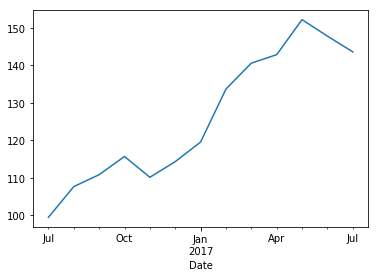

In [15]:
df.loc[:,'Close'].resample('M').mean().plot()

**All available frequency parameters:**  
![image.png](./pic/resample_freq.png)

In [ ]:
draw_w = pd.DataFrame(df.loc[:,'Close'].resample('Q').mean()) 
draw_w.plot(kind='bar')

## date_range

In [17]:
df2 = pd.read_csv('./data/aapl_no_dates.csv')
df2.head(3)

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662


In [18]:
# generate data range from start - end
rng = pd.date_range(start='6/1/2017',end='6/30/2017',freq='B')

In [22]:
df2.set_index(rng,inplace=True)
df2.head(3)

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662


In [30]:
# generate data range give start and periods
# freq: set the unit 
# periods: set the number of units
rng2 = pd.date_range(start='1/1/2017',periods=72,freq='B')
rng2

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

## dataframe.asfreq()

dataframe.asfreq() allow you to regenerate your dataframe according to that new frequency

e.g. fill the  price on weekends

In [27]:
# assume weekends price are same as price in friday

# method : {'backfill'/'bfill', 'pad'/'ffill'}, default None
#  Method to use for filling holes in reindexed Series (note this
#  does not fill NaNs that already were present):

#  * 'pad' / 'ffill': propagate last valid observation forward to next valid
#  * 'backfill' / 'bfill': use NEXT valid observation to fill
df2.asfreq('D',method='ffill').head() # generate a df2 modified copy

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662


In [28]:
df2.asfreq('W',method='ffill')

,Open,High,Low,Close,Volume
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-11,155.19,155.19,146.02,148.98,64882657
2017-06-18,143.78,144.50,142.20,142.27,50361093
2017-06-25,145.13,147.16,145.11,146.28,35439389


## Deal with Holidays

In [32]:
df_no_date = pd.read_csv('./data/aapl_no_dates_16.csv')

In [34]:
df_no_date.head()

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636


### specify the unique holidays

In [36]:
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday

class MyUniqueCalendar(AbstractHolidayCalendar):
# observance: if holiday is in weekends, the nearest workday will be obsorbed
    rules = [
        Holiday('Independent Day', month=7, day=4, observance=nearest_workday),
        Holiday('BirthDay', month=8, day=18, observance=nearest_workday)
    ]
    
myc = CustomBusinessDay(calendar=MyUniqueCalendar())
myc

<CustomBusinessDay>

**Holiday Observance Rules:  **
  
![image.png](./pic/holiday_observance_rules.png)

In [37]:
# 2017.8.18 is friday
pd.date_range(start='8/1/2017',end='8/31/2017',freq=myc)

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
               '2017-08-11', '2017-08-14', '2017-08-15', '2017-08-16',
               '2017-08-17', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', freq='C')

![image.png](./pic/2017_8.png)

if weekends are friday and saturday, the way to handle this is `weekmask` parameters:

In [43]:
# weekmask: to specify the specific work-days
# also can use holidays parameters to exclude that day
myc2 = CustomBusinessDay(calendar=MyUniqueCalendar(),weekmask='Sun Mon Tue Wed Thu',
                         holidays=['2017-08-01'])

In [44]:
pd.date_range(start='8/1/2017',end='8/31/2017',freq=myc2)

DatetimeIndex(['2017-08-02', '2017-08-03', '2017-08-06', '2017-08-07',
               '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-13',
               '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', freq='C')

## pd.to_datetime()

In [47]:
dates = ['2017-01-05 2:30:00 PM','Jan 5, 2017 14:30:00','01/05/2017','2017.01.05','2017/01/05','20170105']

In [48]:
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

US: mm/dd/yyyy  
EU: dd/mm/yyyy  
  
use dayfirst switch to dd/mm/yyyy

In [49]:
pd.to_datetime('5/1/2017',dayfirst=True)

Timestamp('2017-01-05 00:00:00')

use format argument to recognize unique date format

In [50]:
pd.to_datetime('5#1#2017',dayfirst=True,format='%d#%m#%Y')

Timestamp('2017-01-05 00:00:00')

 ### Epoch time

Epoch (unix time) is number of seconds that have passed **since Jan 1, 1970 00:00:00 UTC**  
google search **epoch converter **for transformation

In [51]:
t = 1509347012
# pandas default unit is millionsecond, use unit = 's' to seconds
pd.to_datetime(t,unit='s')

Timestamp('2017-10-30 07:03:32')

In [63]:
 pd.to_datetime([t],unit='s').astype('int64') // 10**9 # switch to nanoseconds ny default

Int64Index([1509347012], dtype='int64')

## Period & timestamp

timestamp is a specific instance of time 
time period (time span): a time duration

Yearly Period

In [65]:
y= pd.Period('2016')
y # period object A:annual, DEC: ending in december

Period('2016', 'A-DEC')

In [66]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [67]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

Monthly Period

In [70]:
m=pd.Period('2011-01',freq='M')
m

Period('2011-01', 'M')

In [71]:
m.start_time

Timestamp('2011-01-01 00:00:00')

In [72]:
m.end_time

Timestamp('2011-01-31 23:59:59.999999999')

Using timestamp object you can use mathmatical operation based on frequency

In [73]:
m+1

Period('2011-02', 'M')

### change Period Frequency

![image.png](./pic/fiscal_year.png)

In [77]:
q = pd.Period('2017Q1',freq='Q-DEC') # based on fiscal year
q

Period('2017Q1', 'Q-DEC')

In [78]:
q+1

Period('2017Q2', 'Q-DEC')

convert quarterly frequency into monthly frequency

In [79]:
q.asfreq("M",how='end')

Period('2017-03', 'M')

In [80]:
q2 = pd.Period('2018Q2',freq='Q-DEC')

In [82]:
q2 - q

5

![image.png](./pic/freq_option.png)

### PeriodIndex

In [90]:
idx = pd.period_range('2011','2017',freq='Q-DEC')
idx

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [87]:
pd.period_range('2011',periods=10,freq='Q-DEC')

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [98]:
ps = pd.Series(np.random.randn(len(idx)),index=idx)
ps.head()

2011Q1   -1.360830
2011Q2   -0.092265
2011Q3   -0.327347
2011Q4   -0.960739
2012Q1    0.461871
Freq: Q-DEC, dtype: float64

In [99]:
ps['2011']

2011Q1   -1.360830
2011Q2   -0.092265
2011Q3   -0.327347
2011Q4   -0.960739
Freq: Q-DEC, dtype: float64

### Period(PeriodIndex) <--> timestamp (DatetimeIndex)

In [104]:
pst = ps.to_timestamp()
pst.head()

2011-01-01   -1.360830
2011-04-01   -0.092265
2011-07-01   -0.327347
2011-10-01   -0.960739
2012-01-01    0.461871
Freq: QS-OCT, dtype: float64

In [106]:
pst.to_period().head()

2011Q1   -1.360830
2011Q2   -0.092265
2011Q3   -0.327347
2011Q4   -0.960739
2012Q1    0.461871
Freq: Q-DEC, dtype: float64

![image.png](./pic/wmt_goal.png)

In [132]:
df = pd.read_csv('./data/wmt.csv')
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [133]:
df.set_index('Line Item',inplace=True)
df

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [134]:
df = df.T # transpose the dataframe
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [135]:
df.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [136]:
df.index = pd.PeriodIndex(df.index,freq='Q-JAN')

In [137]:
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [138]:
df['start time'] = df.index.start_time

In [140]:
df['end time'] = df.index.end_time

In [141]:
df

Line Item,Revenue,Expenses,Profit,start time,end time
2017Q1,115904,86544,29360,2016-02-01,2016-04-30
2017Q2,120854,89485,31369,2016-05-01,2016-07-31
2017Q3,118179,87484,30695,2016-08-01,2016-10-31
2017Q4,130936,97743,33193,2016-11-01,2017-01-31
2018Q1,117542,87688,29854,2017-02-01,2017-04-30


## Time Zone

In [143]:
df = pd.read_csv('./data/msft.csv',header=1,index_col='Date Time',parse_dates=['Date Time'])
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [144]:
df.index # naive datetime not timezone aware

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

### set the time zone (naive datetime --> timezone aware datetime)

In [147]:
df = df.tz_localize(tz='US/Eastern')
df.index # US is 4 hours behind the UTC / UTC+4

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

### convert the time zone

In [148]:
# convert us timezone into berlin timezone UTC-2
df = df.tz_convert(tz='Europe/Berlin') 
# df.index = df.index.tz_convert(tz='Europe/Berlin')  # df.index also works fine
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


timezone are from pytz module

In [150]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

### date_range with time zone

In [152]:
rng = pd.date_range(start='1/1/2017',periods=10,freq='H',tz='Europe/London')
rng

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

### mathmatical operation with timezone

![](./pic/alignment.png)

## Shifting & Lagging

### shifting Price column

In [156]:
df = pd.read_csv('./data/fb.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78


dataframe.shift() can shift price by one unit(day)

In [158]:
df.shift(1).head() # shift forward

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41


In [159]:
df.shift(-1).head() # shift backward

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64


In [160]:
df['prev day price'] = df['Price'].shift(1)

In [162]:
df.head()

,Price,prev day price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41


In [167]:
df['1 day change'] = df['Price'] - df['prev day price']
df.head()

,Price,prev day price,1 day change,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN


In [168]:
df['5 day % return'] = (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,prev day price,1 day change,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


### shift the dates index

want pandas shift dates, freq argument must be set

In [175]:
df= df.asfreq(freq="B")['Price']
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq='B')

In [176]:
df

Date
2017-08-15    171.00
2017-08-16    170.00
2017-08-17    166.91
2017-08-18    167.41
2017-08-21    167.78
2017-08-22    169.64
2017-08-23    168.71
2017-08-24    167.74
2017-08-25    166.32
2017-08-28    167.24
Freq: B, Name: Price, dtype: float64

In [177]:
df.tshift(1)

Date
2017-08-16    171.00
2017-08-17    170.00
2017-08-18    166.91
2017-08-21    167.41
2017-08-22    167.78
2017-08-23    169.64
2017-08-24    168.71
2017-08-25    167.74
2017-08-28    166.32
2017-08-29    167.24
Freq: B, Name: Price, dtype: float64